In [1837]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# import data from cvs files
data20=pd.read_csv('../it_salary_2020.csv')
data19=pd.read_csv('../it_salary_2019.csv')

In [1838]:
# print shape and head
print(data20.shape)
data20.head()

(1253, 23)


,Timestamp,Age,Gender,City,Position,Total years of experience,Years of experience in Germany,Seniority level,Your main technology / programming language,Other technologies/programming languages you use often,...,Annual bonus+stocks one year ago. Only answer if staying in same country,Number of vacation days,Employment status,Сontract duration,Main language at work,Company size,Company type,Have you lost your job due to the coronavirus outbreak?,"Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week","Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR"
0,24/11/2020 11:14:15,26.0,Male,Munich,Software Engineer,5,3,Senior,TypeScript,"Kotlin, Javascript / Typescript",...,10000,30,Full-time employee,Unlimited contract,English,51-100,Product,No,NaN,NaN
1,24/11/2020 11:14:16,26.0,Male,Berlin,Backend Developer,7,4,Senior,Ruby,NaN,...,5000,28,Full-time employee,Unlimited contract,English,101-1000,Product,No,NaN,NaN
2,24/11/2020 11:14:21,29.0,Male,Berlin,Software Engineer,12,6,Lead,Javascript / Typescript,"Javascript / Typescript, Docker",...,100000,30,Self-employed (freelancer),Temporary contract,English,101-1000,Product,Yes,NaN,NaN
3,24/11/2020 11:15:24,28.0,Male,Berlin,Frontend Developer,4,1,Junior,Javascript,NaN,...,NaN,24,Full-time employee,Unlimited contract,English,51-100,Startup,No,NaN,NaN
4,24/11/2020 11:15:46,37.0,Male,Berlin,Backend Developer,17,6,Senior,C# .NET,".NET, SQL, AWS, Docker",...,NaN,29,Full-time employee,Unlimited contract,English,101-1000,Product,No,NaN,NaN


In [1839]:
print(data19.shape)
data19.head()

(991, 23)


,Zeitstempel,Age,Gender,City,Seniority level,Position (without seniority),Years of experience,Your main technology / programming language,Yearly brutto salary (without bonus and stocks),Yearly bonus,...,Yearly stocks one year ago. Only answer if staying in same country,Number of vacation days,Number of home office days per month,Main language at work,Company name,Company size,Company type,Сontract duration,Company business sector,0
0,02.12.2019 11:18:26,33.0,Male,Berlin,Senior,Fullstack Developer,13,PHP,64000.0,1000.0,...,NaN,29.0,4.0,English,NaN,50-100,Startup,unlimited,Tourism,NaN
1,02.12.2019 11:18:35,29.0,Male,Berlin,Middle,Backend Developer,3,Python,55000.0,NaN,...,NaN,22.0,4.0,English,NaN,10-50,Product,unlimited,Scientific Activities,NaN
2,02.12.2019 11:18:56,NaN,Male,Berlin,Middle,Mobile Developer,4,Kotlin,70000.0,NaN,...,NaN,27.0,NaN,English,NaN,1000+,Startup,unlimited,NaN,NaN
3,02.12.2019 11:19:08,30.0,Male,Berlin,Senior,Backend Developer,6,PHP,63000.0,NaN,...,NaN,24.0,NaN,English,Auto1,100-1000,Product,unlimited,Transport,NaN
4,02.12.2019 11:19:37,32.0,Male,Berlin,Senior,Embedded Developer,10,C/C++,66000.0,NaN,...,NaN,30.0,0.0,English,Luxoft,50-100,Product,unlimited,Automotive,NaN


In [1840]:
# rename important columns
data20.rename(columns={
    "Position ": "Position",
    "Total years of experience": "Experience", 
    "Seniority level": "Seniority", 
    "Yearly brutto salary (without bonus and stocks) in EUR": "Salary", 
    "Yearly bonus + stocks in EUR": "Bonus",
    "Number of vacation days": "VacationDays",
    "Сontract duration": "ContractDuration",
    "Main language at work": "Language",
    "Company size": "CompanySize",
    "Company type": "CompanyType"
                     }, inplace=True)

data19.rename(columns={
    "Position (without seniority)": "Position",
    "Years of experience": "Experience", 
    "Seniority level": "Seniority", 
    "Yearly brutto salary (without bonus and stocks)": "Salary", 
    "Yearly bonus": "Bonus",
    "Yearly stocks": "Stocks",
    "Number of vacation days": "VacationDays",
    "Сontract duration": "ContractDuration",
    "Main language at work": "Language",
    "Company size": "CompanySize",
    "Company type": "CompanyType"
                     }, inplace=True)

In [1841]:
# extract valuable columns
df20 = data20[["Age", "Gender", "City", "Position", "Experience", "Salary", "Seniority", "Bonus", "VacationDays", "Language", "CompanySize", "CompanyType"]]
df19 = data19[["Age", "Gender", "City", "Position", "Experience", "Salary", "Seniority", "Bonus" , "Stocks", "VacationDays", "Language", "CompanySize", "CompanyType"]]
print(df20.head())
print(df19.head())

    Age Gender    City            Position Experience    Salary Seniority  \
0  26.0   Male  Munich   Software Engineer          5   80000.0    Senior   
1  26.0   Male  Berlin   Backend Developer          7   80000.0    Senior   
2  29.0   Male  Berlin   Software Engineer         12  120000.0      Lead   
3  28.0   Male  Berlin  Frontend Developer          4   54000.0    Junior   
4  37.0   Male  Berlin   Backend Developer         17   62000.0    Senior   

    Bonus VacationDays Language CompanySize CompanyType  
0    5000           30  English      51-100     Product  
1     NaN           28  English    101-1000     Product  
2  120000           30  English    101-1000     Product  
3     NaN           24  English      51-100     Startup  
4     NaN           29  English    101-1000     Product  
    Age Gender    City             Position  Experience   Salary Seniority  \
0  33.0   Male  Berlin  Fullstack Developer          13  64000.0    Senior   
1  29.0   Male  Berlin    Backend

In [1842]:
print(df20.shape)
print(df19.shape)

(1253, 12)
(991, 13)


In [1843]:
# print amount of null values
df20.isna().sum()

Age              27
Gender           10
City              0
Position          6
Experience       16
Salary            0
Seniority        12
Bonus           424
VacationDays     68
Language         16
CompanySize      18
CompanyType      25
dtype: int64

In [1844]:
df19.isna().sum()

Age             109
Gender            0
City              0
Position          1
Experience        0
Salary            1
Seniority        15
Bonus           461
Stocks          788
VacationDays     60
Language          5
CompanySize      14
CompanyType      31
dtype: int64

In [1845]:
# replace null values in Bonus and Stocks with 0

df20.Bonus.fillna(0, inplace=True)
df19.Bonus.fillna(0, inplace=True)
df19.Stocks.fillna(0, inplace=True)

C:\Users\selak\AppData\Local\Temp\ipykernel_21448\212668846.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df20.Bonus.fillna(0, inplace=True)
C:\Users\selak\AppData\Local\Temp\ipykernel_21448\212668846.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df19.Bonus.fillna(0, inplace=True)
C:\Users\selak\AppData\Local\Temp\ipykernel_21448\212668846.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df19.Stocks.fillna(0, inplace=Tru

In [1846]:
df20.isna().sum()

Age             27
Gender          10
City             0
Position         6
Experience      16
Salary           0
Seniority       12
Bonus            0
VacationDays    68
Language        16
CompanySize     18
CompanyType     25
dtype: int64

In [1847]:
df19.isna().sum()

Age             109
Gender            0
City              0
Position          1
Experience        0
Salary            1
Seniority        15
Bonus             0
Stocks            0
VacationDays     60
Language          5
CompanySize      14
CompanyType      31
dtype: int64

In [1848]:
print(df20.shape)
print(df19.shape)

(1253, 12)
(991, 13)


In [1849]:
df20.head()

,Age,Gender,City,Position,Experience,Salary,Seniority,Bonus,VacationDays,Language,CompanySize,CompanyType
0,26.0,Male,Munich,Software Engineer,5,80000.0,Senior,5000,30,English,51-100,Product
1,26.0,Male,Berlin,Backend Developer,7,80000.0,Senior,0,28,English,101-1000,Product
2,29.0,Male,Berlin,Software Engineer,12,120000.0,Lead,120000,30,English,101-1000,Product
3,28.0,Male,Berlin,Frontend Developer,4,54000.0,Junior,0,24,English,51-100,Startup
4,37.0,Male,Berlin,Backend Developer,17,62000.0,Senior,0,29,English,101-1000,Product


In [1850]:
# remove null values
df20 = df20.dropna()
df19 = df19.dropna()
print(df20.shape)
print(df19.shape)

(1138, 12)
(804, 13)


In [1851]:
print("2020 null values")
print(df20.isna().sum())
print("\n2019 null values")
print(df19.isna().sum())

2020 null values
Age             0
Gender          0
City            0
Position        0
Experience      0
Salary          0
Seniority       0
Bonus           0
VacationDays    0
Language        0
CompanySize     0
CompanyType     0
dtype: int64

2019 null values
Age             0
Gender          0
City            0
Position        0
Experience      0
Salary          0
Seniority       0
Bonus           0
Stocks          0
VacationDays    0
Language        0
CompanySize     0
CompanyType     0
dtype: int64


In [1852]:
print('Gender unique values')
print(df20.Gender.unique())
print(df19.Gender.unique())
print('City unique values')
print(df20.City.unique())
print(df19.City.unique())
print('Position unique values')
print(df20.Position.unique())
print(df19.Position.unique())
print('Seniority unique values')
print(df20.Seniority.unique())
print(df19.Seniority.unique())
print('Language unique values')
print(df20.Language.unique())
print(df19.Language.unique())
print('CompanySize unique values')
print(df20.CompanySize.unique())
print(df19.CompanySize.unique())
print('CompanyType unique values')
print(df20.CompanyType.unique())
print(df19.CompanyType.unique())
print('Bonuse unique values')
print(df20.Bonus.unique())
print(df19.Bonus.unique())
print('VacationDays unique values')
print(df20.VacationDays.unique())
print(df19.VacationDays.unique())
print('Experience unique values')
print(df20.Experience.unique())
print(df19.Experience.unique())
print('Stocks unique values')
print(df19.Stocks.unique())

Gender unique values
['Male' 'Female' 'Diverse']
['Male' 'Female']
City unique values
['Munich' 'Berlin' 'Hamburg' 'Wolfsburg' 'Stuttgart' 'Schleswig-Holstein'
 'Konstanz area' 'Frankfurt' 'Cologne' 'Kempten' 'Münster' 'Erlangen'
 'Vienna' 'Mannheim ' 'Rosenheim' 'Boeblingen' 'Düsseldorf' 'Ingolstadt'
 'Nürnberg' 'Ansbach' 'Leipzig' 'Mannheim' 'Tuttlingen' 'Bonn' 'Moscow'
 'Koblenz' 'Warsaw' 'Heidelberg' 'Köln' 'Aachen' 'Riga, Latvia'
 'Dusseldorf' 'Zurich' 'Helsinki' 'Würzburg' 'Kiev' 'Den Haag' 'London'
 'Amsterdam' 'Cracovia' 'Tallinn' 'Prague' 'Utrecht' 'Stockholm'
 'Braunschweig ' 'Dresden' 'Kyiv' 'Stuttgart ' 'Malta' 'Lübeck'
 'Nuremberg ' 'Bodensee' 'Milan' 'Salzburg' 'Rome' 'Wroclaw' 'Karlsruhe'
 'Cupertino' 'Paris' 'Dublin ' 'Paderborn' 'Konstanz' 'Ulm' 'Barcelona'
 'Bölingen' 'Tampere (Finland)' 'Hannover' 'Siegen' 'Minsk' 'Düsseldorf '
 'Nuremberg' 'Marseille' 'Friedrichshafen' 'Walldorf' 'Eindhoven' 'France'
 'Regensburg' 'Warsaw, Poland' 'Heilbronn' 'Dortmund' 'City in Rus

In [1853]:
# cleaning gender column
print(df20.Gender.value_counts()['Diverse'])

1


In [1854]:
df20.drop(df20[df20.Gender == 'Diverse'].index, inplace=True)
df20.Gender.unique()

array(['Male', 'Female'], dtype=object)

In [1855]:
# cleaning city columns
df20.City = df20.City.str.lower().str.strip()
df19.City = df19.City.str.lower().str.strip()

# replace letters with more common alternatives
df20 = df20.replace({'City': {'ö': 'o', 'ü': 'u','ń':'n'}}, regex=True)
df19 = df19.replace({'City': {'ö': 'o', 'ü': 'u','ń':'n'}}, regex=True)

print('City unique values')
df20Cities = df20.City.unique() 
df19Cities = df19.City.unique()
df20Cities.sort()
df19Cities.sort()
print(df20Cities)
print(df19Cities)

City unique values
['aachen' 'amsterdam' 'ansbach' 'barcelona' 'basel' 'berlin' 'bielefeld'
 'bodensee' 'boeblingen' 'bolingen' 'bonn' 'braunschweig' 'brunswick'
 'brussels' 'cambridge' 'city in russia' 'cologne' 'copenhagen' 'cracovia'
 'cracow' 'cupertino' 'darmstadt' 'den haag' 'dortmund' 'dresden' 'dublin'
 'duesseldorf' 'dusseldorf' 'dusseldurf' 'eindhoven' 'erlangen' 'fr'
 'france' 'frankfurt' 'friedrichshafen' 'hamburg' 'hannover' 'heidelberg'
 'heilbronn' 'helsinki' 'hildesheim' 'ingolstadt' 'innsbruck' 'istanbul'
 'karlsruhe' 'kempten' 'kiev' 'koblenz' 'koln' 'konstanz' 'konstanz area'
 'krakow' 'kyiv' 'leipzig' 'lisbon' 'london' 'lubeck' 'luttich' 'madrid'
 'malta' 'mannheim' 'marseille' 'milan' 'milano' 'minsk' 'moscow' 'munich'
 'munster' 'murnau am staffelsee' 'nuremberg' 'nurnberg' 'paderborn'
 'paris' 'prague' 'prefer not to say' 'regensburg' 'riga, latvia' 'rome'
 'rosenheim' 'saarbrucken' 'saint-petersburg' 'salzburg'
 'schleswig-holstein' 'sevilla' 'siegen' 'sofia' 's

In [1856]:
# clean cities defined with many different names
df20 = df20.replace({'City': {'bolingen':'bollingen',
                              'brunswick': 'braunschweig',
                              'duesseldorf':'dusseldorf',
                              'dusseldurf':'dusseldorf',
                              'cologne':'koln',
                              'konstanz area':'konstanz',
                              'cracovia':'krakow',
                              'kiev': 'kyiv',
                              'milano': 'milan',
                              'nurnberg': 'nuremberg',
                              'den haag':'the haag',
                              'saint-petersburg':'saint petersburg',
                              'warsaw, poland':'warsaw',
                              'riga, latvia': 'riga'
                              }})
df19 = df19.replace({'City': {'cologne':'koln','kiev': 'kyiv', 'saint-petersburg':'saint petersburg'}})

# remove columns with wrong cities
df20.drop(df20[(df20.City == 'fr') | (df20.City == 'france') | (df20.City == 'prefer not to say')].index, inplace=True)
df19.drop(df19[df19.City == 'ma'].index, inplace=True)

print('City new unique values')
df20Cities = df20.City.unique() 
df19Cities = df19.City.unique()
df20Cities.sort()
df19Cities.sort()
print(df20Cities)
print(df19Cities)

City new unique values
['aachen' 'amsterdam' 'ansbach' 'barcelona' 'basel' 'berlin' 'bielefeld'
 'bodensee' 'boeblingen' 'bollingen' 'bonn' 'braunschweig' 'brussels'
 'cambridge' 'city in russia' 'copenhagen' 'cracow' 'cupertino'
 'darmstadt' 'dortmund' 'dresden' 'dublin' 'dusseldorf' 'eindhoven'
 'erlangen' 'frankfurt' 'friedrichshafen' 'hamburg' 'hannover'
 'heidelberg' 'heilbronn' 'helsinki' 'hildesheim' 'ingolstadt' 'innsbruck'
 'istanbul' 'karlsruhe' 'kempten' 'koblenz' 'koln' 'konstanz' 'krakow'
 'kyiv' 'leipzig' 'lisbon' 'london' 'lubeck' 'luttich' 'madrid' 'malta'
 'mannheim' 'marseille' 'milan' 'minsk' 'moscow' 'munich' 'munster'
 'murnau am staffelsee' 'nuremberg' 'paderborn' 'paris' 'prague'
 'regensburg' 'riga' 'rome' 'rosenheim' 'saarbrucken' 'saint petersburg'
 'salzburg' 'schleswig-holstein' 'sevilla' 'siegen' 'sofia' 'stockholm'
 'stuttgart' 'tallinn' 'tampere (finland)' 'the haag' 'tuttlingen' 'ulm'
 'utrecht' 'vienna' 'walldorf' 'warsaw' 'wolfsburg' 'wroclaw' 'wurzbur

In [1857]:
# clean position and seniority

df20.Position = df20.Position.str.lower().str.strip()
df19.Position = df19.Position.str.lower().str.strip()

df20 = df20.replace({'Seniority': {
    'Work Center Manager':'Manager',
    'Working Student': 'Junior', 
    'student':'Junior', 
    'Student':'Junior', 
    'Entry level':'Junior', 
    'CTO':'C-Level', 
    'Director':'C-Level', 
    'C-level executive manager':'C-Level',
    'VP':'C-Level',
    'intern':'Intern',
    'no idea, there are no ranges in the firm ': 'No level',
    'No level ': 'No level',
    'Key': 'No level',
    }})
df20.Seniority.unique()

array(['Senior', 'Lead', 'Junior', 'Middle', 'Head', 'No level',
       'C-Level', 'Manager', 'Principal', 'Intern', 'Self employed'],
      dtype=object)

In [1858]:
# clean experience column
df20 = df20.replace({'Experience': {
    '1,5':'1.5', 
    '1 (as QA Engineer) / 11 in total': '11',
    '2,5':'2.5',
    '15, thereof 8 as CTO':'15',
    'less than year': '0',
    }})
df20.Experience = df20.Experience.astype(float)
df20.Experience = df20.Experience.astype(int)

df20Experience = df20.Experience.unique()
df20Experience.sort()
df20Experience

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 40])

In [1859]:
# cleaning VacationDays column 
df20.VacationDays = df20.VacationDays.str.lower().str.strip()
df20 = df20.replace({'VacationDays': {
    'unlimited':'365',
    '(no idea)': np.nan,
    '30 in contract (but theoretically unlimited)':'365',
    '~25':'25',
    '23+': '23',
    '24 labour days': '24',
    }})
df20 = df20.dropna()
df20.VacationDays = df20.Experience.astype(float).astype(int)
df20.VacationDays.unique()
df19.VacationDays = df19.Experience.astype(float).astype(int)

In [1860]:
# clean Language column
df20 = df20.replace({'Language': {
    'English and German':'Many',
    'Русский':'Russian',
    'both':'Many',
    'English and German':'Many',
    'Russian, English':'Many',
    }})
df19 = df19.replace({'Language': {
    'Deutsch':'German',
    'English+Deutsch':'Many',
    'Polish+English':'Many',
    }})

print('Language unique values')
print(df20.Language.unique())
print(df19.Language.unique())

Language unique values
['English' 'German' 'Many' 'Russian' 'Polish' 'Czech' 'Italian'
 'Deuglisch' 'Spanish']
['English' 'German' 'Many' 'Russian' 'Spanish' 'French' 'Italian' 'Polish']


In [1861]:
# clean company size and company type

# replace the 2019 survey values to be the same as 2020 (small errors possible)
df19 = df19.replace({'CompanySize': {
    '50-100':'51-100',
    '10-50':'11-50',
    '100-1000':'101-1000',
    }})

df20.CompanyType = df20.CompanyType.str.lower().str.strip()
df19.CompanyType = df19.CompanyType.str.lower().str.strip()
df20 = df20.replace({'CompanyType': {
    'bloody enterprise':'enterprise',
    'e-commerce':'ecommerce',
    'financial':'finance',
    'fintech':'finance',
    'it-outsourcing':'outsource',
    'outsorce':'outsource',
    'publishing and technology':'publisher',
    'research institute':'research',
    'market research':'research',
    }})
df19 = df19.replace({'CompanyType': {
    'bodyshop / outsource':'outsource',
    }})
print('CompanyType unique values')
print(df20.CompanyType.unique())
print(df19.CompanyType.unique())

CompanyType unique values
['product' 'startup' 'consulting / agency' 'media' 'cloud' 'behörde'
 'big commercial' 'outsource' 'bank' 'finance' 'automotive'
 'it department of established business' 'telecommunications' 'ecommerce'
 'systemhaus' 'university' 'consumer goods' 'game company' 'corporation'
 'publisher' 'research' 'saas' 'energy' 'enterprise' 'service' 'concern'
 'utilities' 'insurance' 'science institute' 'retail' 'semiconductor'
 'handel' 'consulting and product' 'education' 'pharma'
 'transport & logistics' 'biergarten' 'non-tech retail'
 'corporate incubator' 'multinational' 'industry' 'faang' 'old industry'
 'outsourse' 'freelance']
['startup' 'product' 'consulting / agency' 'outsource' 'university' 'bank']


In [1862]:
# clean bonus and merge bonus and stocks
df20 = df20.replace({'Bonus': {
    '15000+-':'15000',
    '122.13':'122',

    }})
df20.Bonus = pd.to_numeric(df20.Bonus, errors='coerce')
df20.dropna(inplace=True)

df19.Bonus = df19.Bonus + df19.Stocks
df19.drop(columns=['Stocks'], inplace=True)
df19.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 803 entries, 0 to 990
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           803 non-null    float64
 1   Gender        803 non-null    object 
 2   City          803 non-null    object 
 3   Position      803 non-null    object 
 4   Experience    803 non-null    int64  
 5   Salary        803 non-null    float64
 6   Seniority     803 non-null    object 
 7   Bonus         803 non-null    float64
 8   VacationDays  803 non-null    int32  
 9   Language      803 non-null    object 
 10  CompanySize   803 non-null    object 
 11  CompanyType   803 non-null    object 
dtypes: float64(3), int32(1), int64(1), object(7)
memory usage: 78.4+ KB


In [1863]:
df20.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1128 entries, 0 to 1252
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           1128 non-null   float64
 1   Gender        1128 non-null   object 
 2   City          1128 non-null   object 
 3   Position      1128 non-null   object 
 4   Experience    1128 non-null   int32  
 5   Salary        1128 non-null   float64
 6   Seniority     1128 non-null   object 
 7   Bonus         1128 non-null   float64
 8   VacationDays  1128 non-null   int32  
 9   Language      1128 non-null   object 
 10  CompanySize   1128 non-null   object 
 11  CompanyType   1128 non-null   object 
dtypes: float64(3), int32(2), object(7)
memory usage: 105.8+ KB


In [1864]:
print(df20.shape)
print(df19.shape)

(1128, 12)
(803, 12)


In [1865]:
df20['Year'] = 2020
df19['Year'] = 2019

df20.head()

,Age,Gender,City,Position,Experience,Salary,Seniority,Bonus,VacationDays,Language,CompanySize,CompanyType,Year
0,26.0,Male,munich,software engineer,5,80000.0,Senior,5000.0,5,English,51-100,product,2020
1,26.0,Male,berlin,backend developer,7,80000.0,Senior,0.0,7,English,101-1000,product,2020
2,29.0,Male,berlin,software engineer,12,120000.0,Lead,120000.0,12,English,101-1000,product,2020
3,28.0,Male,berlin,frontend developer,4,54000.0,Junior,0.0,4,English,51-100,startup,2020
4,37.0,Male,berlin,backend developer,17,62000.0,Senior,0.0,17,English,101-1000,product,2020


In [1866]:
df = pd.concat([df20, df19])
print(df.shape)
df.head()

(1931, 13)


,Age,Gender,City,Position,Experience,Salary,Seniority,Bonus,VacationDays,Language,CompanySize,CompanyType,Year
0,26.0,Male,munich,software engineer,5,80000.0,Senior,5000.0,5,English,51-100,product,2020
1,26.0,Male,berlin,backend developer,7,80000.0,Senior,0.0,7,English,101-1000,product,2020
2,29.0,Male,berlin,software engineer,12,120000.0,Lead,120000.0,12,English,101-1000,product,2020
3,28.0,Male,berlin,frontend developer,4,54000.0,Junior,0.0,4,English,51-100,startup,2020
4,37.0,Male,berlin,backend developer,17,62000.0,Senior,0.0,17,English,101-1000,product,2020


In [1867]:

df.sort_values(by=['Salary'], ascending=False)

,Age,Gender,City,Position,Experience,Salary,Seniority,Bonus,VacationDays,Language,CompanySize,CompanyType,Year
853,29.0,Female,koln,ml engineer,1,500000000.0,Middle,5.000000e+09,1,English,up to 10,startup,2020
778,42.0,Male,berlin,frontend developer,18,850000.0,Senior,9.500000e+04,18,English,101-1000,product,2020
630,40.0,Male,cupertino,software engineer,20,250000.0,Lead,4.500000e+05,20,English,1000+,product,2020
804,20.0,Male,berlin,mobile developer,5,240000.0,Lead,1.500000e+04,5,English,1000+,product,2020
116,31.0,Male,berlin,"cto (ceo, cfo)",12,210000.0,Head,1.000000e+03,12,English,1000+,product,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...
680,25.0,Female,hamburg,working student (qa),1,12000.0,Junior,0.000000e+00,1,English,1000+,product,2020
1135,24.0,Male,berlin,ml engineer,0,11500.0,Junior,0.000000e+00,0,English,11-50,consulting / agency,2020
366,24.0,Male,aachen,hiwi,3,10164.0,Junior,0.000000e+00,3,English,11-50,university,2020
982,22.0,Male,istanbul,backend developer,3,10001.0,Middle,0.000000e+00,3,English,up to 10,startup,2020


In [1868]:
df.sort_values(by=['Salary'])

,Age,Gender,City,Position,Experience,Salary,Seniority,Bonus,VacationDays,Language,CompanySize,CompanyType,Year
940,21.0,Male,nizhny novgorod,mobile developer,1,6000.0,Junior,0.000000e+00,1,Russian,51-100,outsource,2019
982,22.0,Male,istanbul,backend developer,3,10001.0,Middle,0.000000e+00,3,English,up to 10,startup,2020
366,24.0,Male,aachen,hiwi,3,10164.0,Junior,0.000000e+00,3,English,11-50,university,2020
1135,24.0,Male,berlin,ml engineer,0,11500.0,Junior,0.000000e+00,0,English,11-50,consulting / agency,2020
680,25.0,Female,hamburg,working student (qa),1,12000.0,Junior,0.000000e+00,1,English,1000+,product,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,31.0,Male,berlin,"cto (ceo, cfo)",12,210000.0,Head,1.000000e+03,12,English,1000+,product,2019
804,20.0,Male,berlin,mobile developer,5,240000.0,Lead,1.500000e+04,5,English,1000+,product,2020
630,40.0,Male,cupertino,software engineer,20,250000.0,Lead,4.500000e+05,20,English,1000+,product,2020
778,42.0,Male,berlin,frontend developer,18,850000.0,Senior,9.500000e+04,18,English,101-1000,product,2020


In [1869]:
# drop extremely high salaries
df.drop(df20[df20.Salary >= 500000].index, inplace=True)
df.sort_values(by=['Salary'], ascending=False)

,Age,Gender,City,Position,Experience,Salary,Seniority,Bonus,VacationDays,Language,CompanySize,CompanyType,Year
630,40.0,Male,cupertino,software engineer,20,250000.0,Lead,450000.0,20,English,1000+,product,2020
804,20.0,Male,berlin,mobile developer,5,240000.0,Lead,15000.0,5,English,1000+,product,2020
116,31.0,Male,berlin,"cto (ceo, cfo)",12,210000.0,Head,1000.0,12,English,1000+,product,2019
823,45.0,Female,munich,backend developer,20,200000.0,Senior,20000.1,20,German,101-1000,product,2019
441,32.0,Male,berlin,cto,10,200000.0,C-Level,200000.0,10,English,101-1000,product,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...
680,25.0,Female,hamburg,working student (qa),1,12000.0,Junior,0.0,1,English,1000+,product,2020
1135,24.0,Male,berlin,ml engineer,0,11500.0,Junior,0.0,0,English,11-50,consulting / agency,2020
366,24.0,Male,aachen,hiwi,3,10164.0,Junior,0.0,3,English,11-50,university,2020
982,22.0,Male,istanbul,backend developer,3,10001.0,Middle,0.0,3,English,up to 10,startup,2020


### **Data has been cleaned, now it is time to analyze the dataset**
The most important thing that we are interested in is the salary, in the next section we will be analyzing and ploting the influence of different factors on the yearly salary in the IT industry.

In [1870]:
# counting IT professional by gender
print('Count:')
print(df.Gender.value_counts())
print('\nRatio:')
print(df.Gender.value_counts('Male'))


Count:
Male      1630
Female     297
Name: Gender, dtype: int64

Ratio:
Male      0.845874
Female    0.154126
Name: Gender, dtype: float64


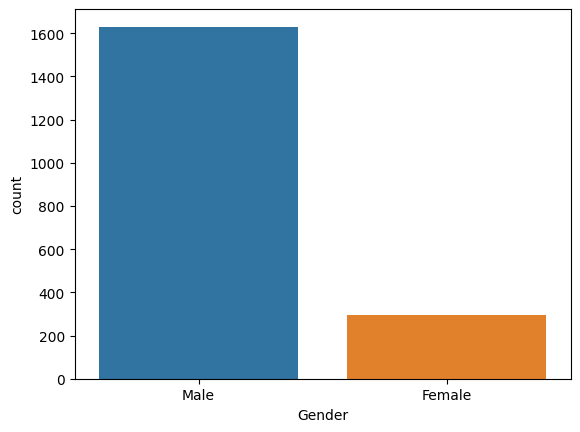

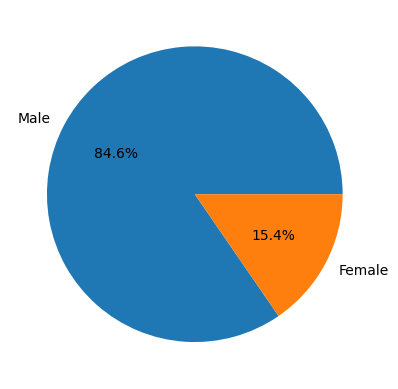

In [1871]:
def genCountPlot(data, x):
    sns.countplot(data=data, x=x)
    plt.show()

genCountPlot(df, 'Gender')

def genPieChart(values, labels):
    plt.pie(values, labels=labels, autopct='%1.1f%%')
    plt.show()

genPieChart(df.Gender.value_counts(), df.Gender.unique())

In [1872]:
# average salary by gender
avgSal = df.groupby('Gender')['Salary'].mean()
print('Average salary for females: ', avgSal['Female'].round(), '€')
print('Average salary for males: ', avgSal['Male'].round(), '€')

Average salary for females:  59929.0 €
Average salary for males:  72925.0 €


In [1873]:
ages = df.Age.unique()
ages.sort()
ages

array([20., 21., 22., 23., 24., 25., 26., 27., 28., 29., 30., 31., 32.,
       33., 34., 35., 36., 37., 38., 39., 40., 41., 42., 43., 44., 45.,
       46., 47., 48., 49., 50., 51., 52., 54., 56., 59., 65., 66.])

In [1874]:
avgSal = df.groupby('Age')['Salary'].mean()
avgSal


Age
20.0    127200.000000
21.0     16633.333333
22.0     44428.714286
23.0     53284.388889
24.0     52643.666667
25.0     59476.923077
26.0     59453.974359
27.0     62594.020619
28.0     64314.074074
29.0     67363.138686
30.0     69944.864407
31.0     73686.839416
32.0     72994.230769
33.0     73819.519231
34.0     75658.536585
35.0     73795.522388
36.0     74798.901099
37.0     74211.000000
38.0     79234.520548
39.0     80994.512195
40.0     87804.347826
41.0     84337.500000
42.0     73070.967742
43.0     76506.250000
44.0     77033.333333
45.0     81142.105263
46.0     71291.666667
47.0     70333.333333
48.0     61250.000000
49.0     91000.000000
50.0     28800.000000
51.0     60000.000000
52.0     60000.000000
54.0     87666.666667
56.0     92500.000000
59.0     69000.000000
65.0     55000.000000
66.0     70000.000000
Name: Salary, dtype: float64

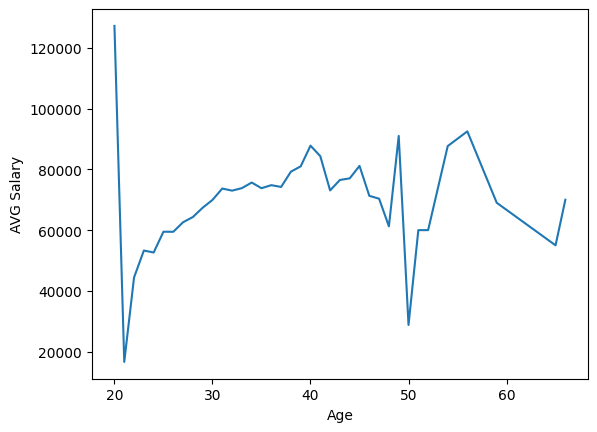

In [1875]:
def genLineChart(xValues, yValues, xLabel, yLabel):
    plt.plot(xValues, yValues)
    plt.xlabel(xLabel)
    plt.ylabel(yLabel)
    plt.show()

genLineChart(avgSal.keys(), avgSal.values, 'Age', 'AVG Salary')

Age frequencies: 
 20.0      2
21.0      3
22.0      7
23.0     18
24.0     42
25.0     65
26.0     78
27.0     97
28.0    135
29.0    137
30.0    177
31.0    137
32.0    156
33.0    156
34.0    123
35.0    134
36.0     91
37.0     70
38.0     73
39.0     41
40.0     46
41.0     24
42.0     31
43.0     16
44.0     15
45.0     19
46.0     12
47.0      3
48.0      4
49.0      4
50.0      1
51.0      1
52.0      1
54.0      3
56.0      2
59.0      1
65.0      1
66.0      1
Name: Age, dtype: int64


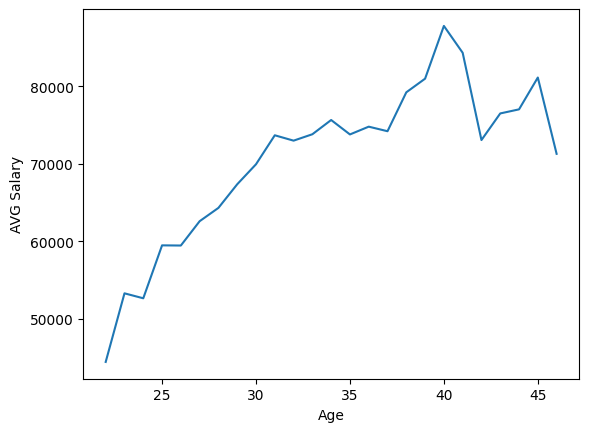

In [1876]:
# it seams that the previous graph has some noise so lets remove ages that don't have more then 4 entries
ageFreq = df.Age.value_counts().sort_index()
print('Age frequencies: \n', ageFreq)
relevantAges = ageFreq.loc[lambda x : x > 4].keys()
values = avgSal.filter(items=relevantAges)

genLineChart(relevantAges, values, 'Age', 'AVG Salary')

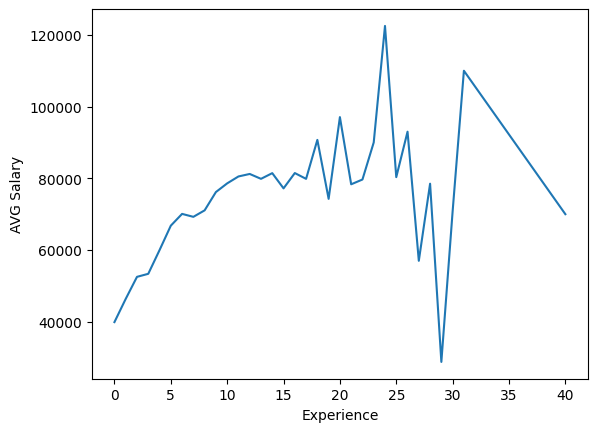

In [1877]:
avgSal = df.groupby('Experience')['Salary'].mean()

genLineChart(avgSal.keys(), avgSal.values, 'Experience', 'AVG Salary')

Experience frequencies: 
 0      12
1      62
2     107
3     113
4     123
5     191
6     147
7     137
8     146
9     101
10    217
11     77
12    105
13     61
14     53
15    102
16     38
17     20
18     26
19     12
20     42
21      3
22      9
23      1
24      2
25      9
26      1
27      1
28      1
29      1
30      5
31      1
40      1
Name: Experience, dtype: int64


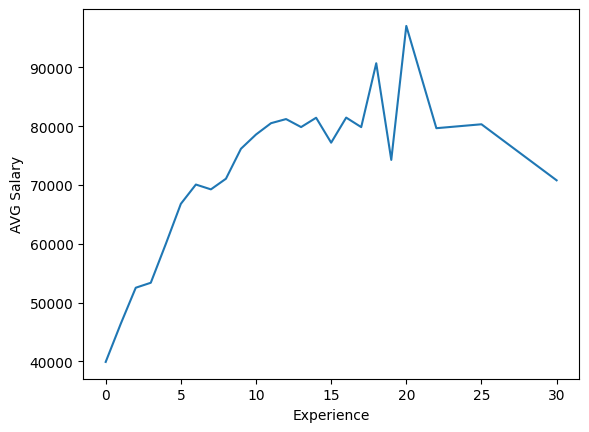

In [1878]:
avgSal = df.groupby('Experience')['Salary'].mean()
expFreq = df.Experience.value_counts().sort_index()
print('Experience frequencies: \n', expFreq)
relevantExp = expFreq.loc[lambda x : x > 4].keys()
values = avgSal.filter(items=relevantExp)

genLineChart(relevantExp, values, 'Experience', 'AVG Salary')

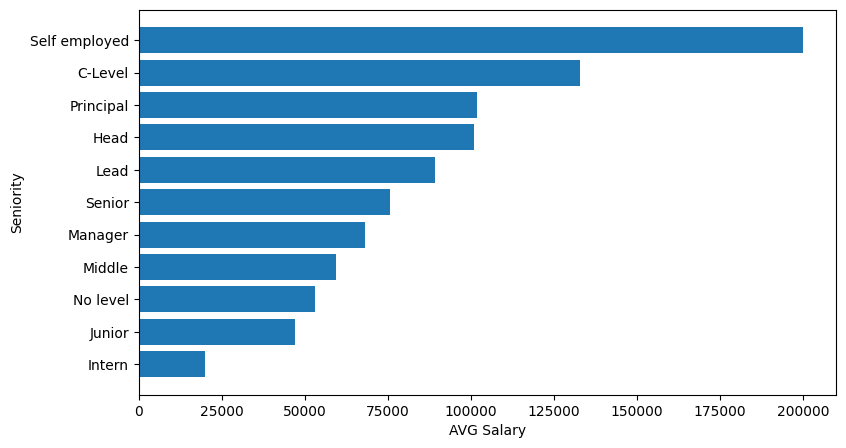

In [1879]:
def genHorizontalBarPlot(yValues, xValues, xLabel, yLabel):
    plt.figure(figsize=(9, 5))
    plt.barh(yValues, xValues)
    plt.xlabel(xLabel)
    plt.ylabel(yLabel)
    plt.show()

avgSal = df.groupby('Seniority')['Salary'].mean().sort_values()
genHorizontalBarPlot(avgSal.keys(), avgSal.values,  'AVG Salary','Seniority')

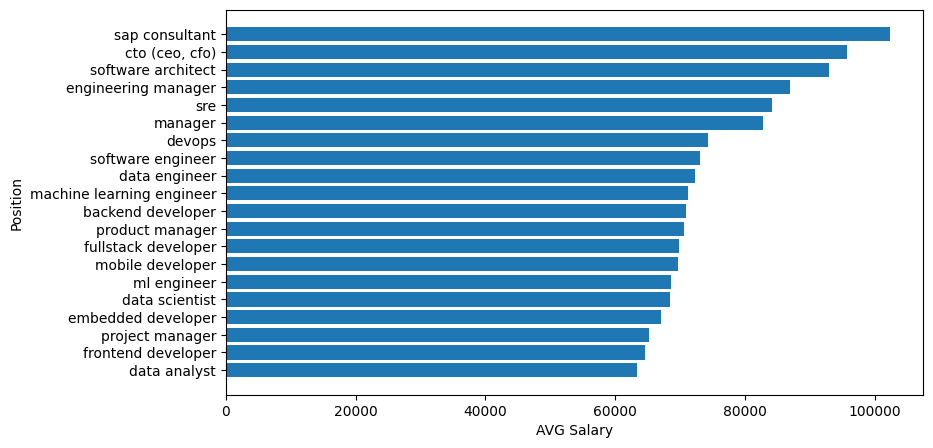

In [1880]:
avgSal = df.groupby('Position')['Salary'].mean()
posFreq = df.Position.value_counts()
relevantPos = posFreq.loc[lambda x : x > 4]
values = avgSal.filter(items=relevantPos.keys())
values = values.sort_values()[-20:]
genHorizontalBarPlot(values.keys(), values.values,  'AVG Salary','Position')

backend developer            363
software engineer            362
data scientist               190
frontend developer           140
devops                        91
mobile developer              86
fullstack developer           72
qa engineer                   64
data engineer                 52
qa                            48
manager                       47
product manager               43
ml engineer                   34
software architect            33
machine learning engineer     22
business analyst              19
designer (ui/ux)              13
embedded developer            12
sre                           12
engineering manager           11
researcher                    11
data analyst                  11
system administrator           7
sap consultant                 7
project manager                6
cto (ceo, cfo)                 6
support                        5
Name: Position, dtype: int64


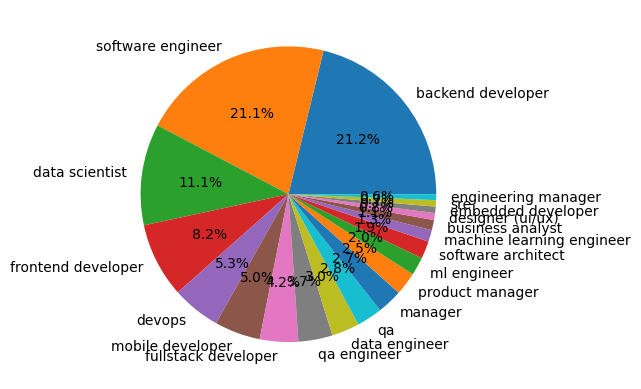

In [1881]:
print(relevantPos)
genPieChart(relevantPos[0: 20].values, relevantPos[0:20].keys())